In [13]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sympy import symbols, simplify, expand, lambdify, Float, pretty, sympify

In [14]:
def diferencas_finitas(y_vals):
    """Calcula a tabela de diferenças finitas progressivas."""
    n = len(y_vals)
    diff_table = [y_vals.copy()]
    for i in range(1, n):
        nova_linha = [diff_table[i-1][j+1] - diff_table[i-1][j] for j in range(n - i)]
        diff_table.append(nova_linha)
    return diff_table

In [ ]:
def interpolacao_gregory_newton(x_vals, y_vals, grau):
    """
    Aplica o método de interpolação de Gregory-Newton progressivo até o grau especificado.
    """
    x = symbols('x')
    h = x_vals[1] - x_vals[0]
    t = (x - x_vals[0]) / h

    diff_table = diferencas_finitas(y_vals)
    polinomio = 0
    termo_t = 1

    for i in range(grau + 1):
        polinomio += diff_table[i][0] * termo_t / math.factorial(i)
        termo_t *= (t - i)

    polinomio = simplify(expand(polinomio))
    coeffs = polinomio.as_poly(x).all_coeffs()
    arredondados = [Float(c.evalf(), 5) for c in coeffs]
    polinomio = sum(c * x**i for i, c in enumerate(reversed(arredondados)))

    f_interp = lambdify(x, polinomio, 'numpy')
    return polinomio, f_interp, diff_table

Interpolação de Gregory-Newton



Polinômio interpolador de Gregory-Newton:
           3           2           
0.0062417⋅x  - 0.2395⋅x  + 3.8268⋅x
Para x = 15.6000, y estimado = 25.1094
Limitante superior estimado do erro: 0.0000


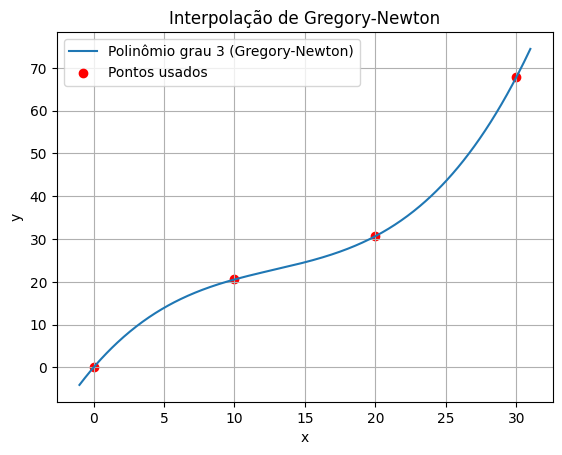

In [22]:
# === ENTRADA DE DADOS ===
print("Interpolação de Gregory-Newton")
modo = input("Escolha o modo de entrada:\n1 - Inserir x e y manualmente\n2 - Inserir x e uma função f(x)\nOpção: ")

n = int(input("Digite o número total de pontos (n): "))
x_vals = []
y_vals = []

for i in range(n):
    x = float(input(f"x{i}: "))
    x_vals.append(x)

if modo == '1':
    for i in range(n):
        y = float(input(f"y{i}: "))
        y_vals.append(y)
elif modo == '2':
    func_str = input("Digite a função f(x): ")
    x = symbols('x')
    try:
        f = lambdify(x, sympify(func_str), modules='numpy')
        y_vals = [f(xi) for xi in x_vals]
    except Exception as e:
        raise ValueError("Erro ao interpretar a função: " + str(e))
else:
    raise ValueError("Modo inválido.")

# Verificar espaçamento uniforme
if not np.allclose(np.diff(x_vals), x_vals[1] - x_vals[0]):
    raise ValueError("Os valores de x devem ser igualmente espaçados para Gregory-Newton.")

# Solicitar grau do polinômio
max_grau = n - 1
grau = int(input(f"Informe o grau desejado do polinômio (0 a {max_grau}): "))
if grau > max_grau or grau < 0:
    raise ValueError("Grau inválido para a quantidade de pontos.")

# Seleciona apenas os pontos necessários
x_vals = x_vals[:grau + 1]
y_vals = y_vals[:grau + 1]

# Interpolação
P, f_interp, diff_table = interpolacao_gregory_newton(x_vals, y_vals, grau)

print("\nPolinômio interpolador de Gregory-Newton:")
print(pretty(P, use_unicode=True))

# === AVALIAÇÃO DE PONTOS ===
while True:
    entrada = input("\nDigite um valor de x para estimar y (ou 'sair' para encerrar): ")
    if entrada.lower() == 'sair':
        break
    try:
        x_input = float(entrada)
        y_aproximado = f_interp(x_input)

        # Estimativa de erro (última diferença considerada)
        produto = 1
        for i in range(grau + 1):
            produto *= abs(x_input - x_vals[i])

        if grau + 1 < len(diff_table):
            ultima_diferenca = abs(diff_table[grau + 1][0])
        else:
            ultima_diferenca = 0

        erro_estimado = (produto / math.factorial(grau + 1)) * ultima_diferenca

        print(f"Para x = {x_input:.4f}, y estimado = {y_aproximado:.4f}")
        print(f"Limitante superior estimado do erro: {erro_estimado:.4f}")

    except Exception as e:
        print("Erro ao processar entrada:", e)

# Gráfico
x_plot = np.linspace(min(x_vals) - 1, max(x_vals) + 1, 500)
y_plot = f_interp(x_plot)

plt.plot(x_plot, y_plot, label=f'Polinômio grau {grau} (Gregory-Newton)')
plt.scatter(x_vals, y_vals, color='red', label='Pontos usados')
plt.title('Interpolação de Gregory-Newton')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()